## Step 1: Import necessary libaries

In [24]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlretrieve

import warnings
warnings.filterwarnings('ignore')

## Step 2: Import the Dataset

In [25]:
# Assign url of file: url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# save file locally
urlretrieve(url, 'Iris.csv')

# Read file into a Dataframe and print its head
df = pd.read_csv("Iris.csv")
print(df.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


## Step 3: Dataset Overview

In [26]:
# Set the name of columns
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [27]:
df.shape

(149, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [29]:
# Get the description of the DataFrame and Round the number in the description to 2 decimal
df.describe().round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.00,149.00,149.00,149.00
mean,5.85,3.05,3.77,1.21
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [30]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

In [31]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Step 4: EDA

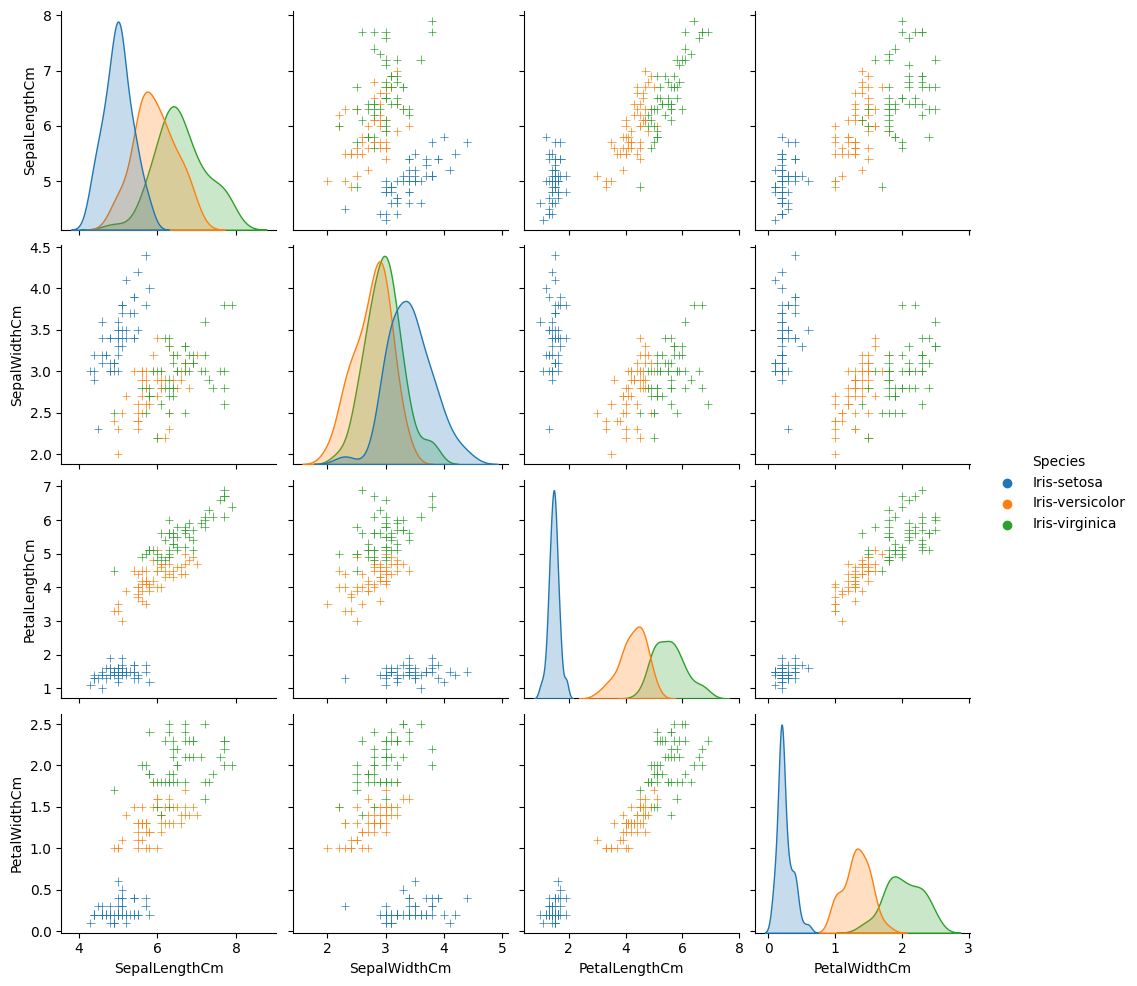

In [32]:
df_drop = sns.pairplot(df, hue = 'Species', markers = '+')
plt.show()

In [33]:
# Correlation overview:
corr = df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.103784,0.871283,0.816971
SepalWidthCm,-0.103784,1.000000,-0.415218,-0.350733
PetalLengthCm,0.871283,-0.415218,1.000000,0.962314
PetalWidthCm,0.816971,-0.350733,0.962314,1.000000


<Axes: >

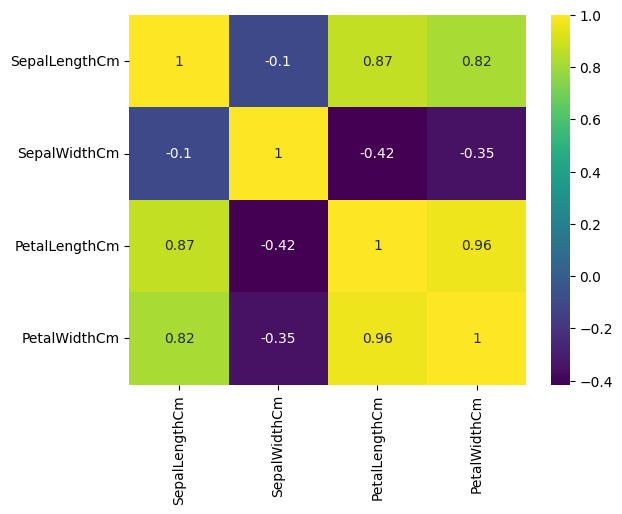

In [34]:
sns.heatmap(corr, cmap = 'viridis', annot= True)

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

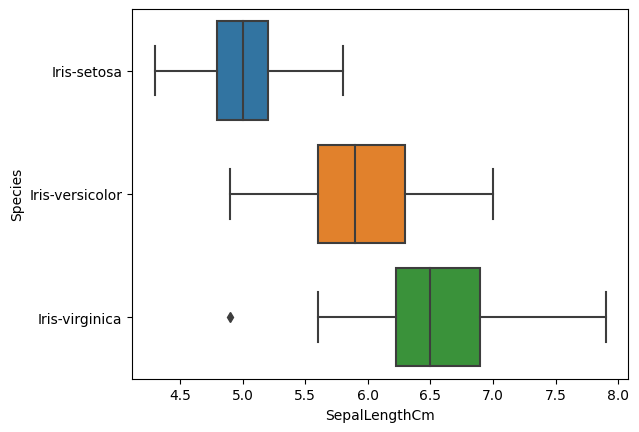

In [35]:
# y = target column
# This plot use to noisy data
sns.boxplot(data= df, x = 'SepalLengthCm', y='Species')

<Axes: xlabel='SepalWidthCm', ylabel='Species'>

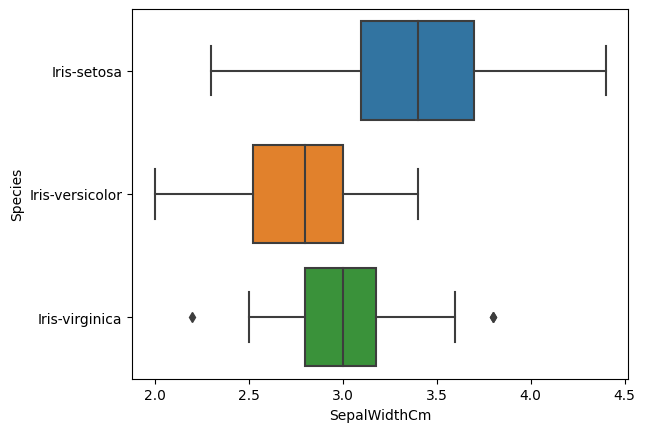

In [36]:
sns.boxplot(data= df, x = 'SepalWidthCm', y='Species')

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

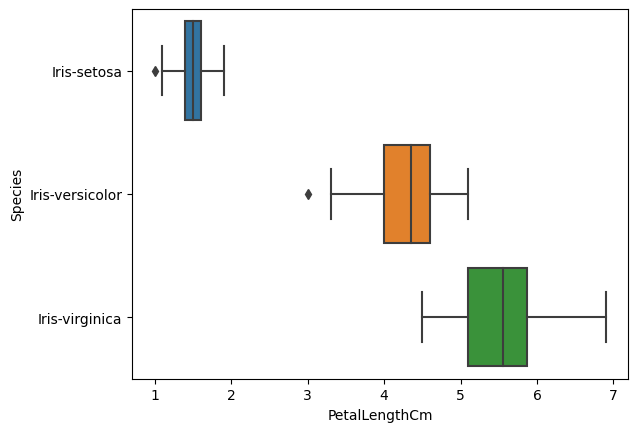

In [37]:
sns.boxplot(data= df, x = 'PetalLengthCm', y='Species')

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

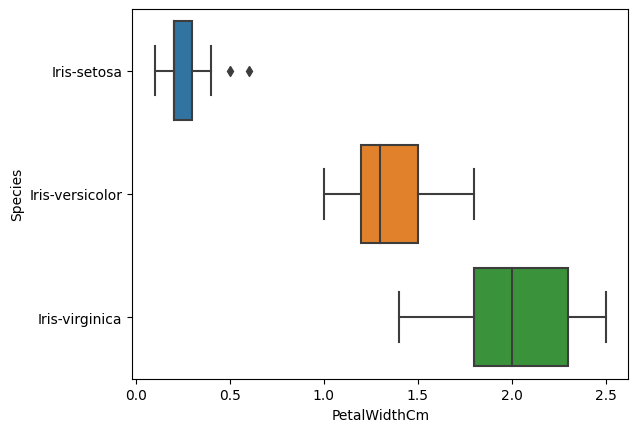

In [38]:
sns.boxplot(data= df, x = 'PetalWidthCm', y='Species')

## Step 5: Data Prepration

In [39]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**Label_Encoding (Encoding the Categorical features)**

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df[['Species']])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [42]:
df['Species'].unique()

array([0, 1, 2], dtype=int64)

**Removing outlier data for SepalLengthCM**

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

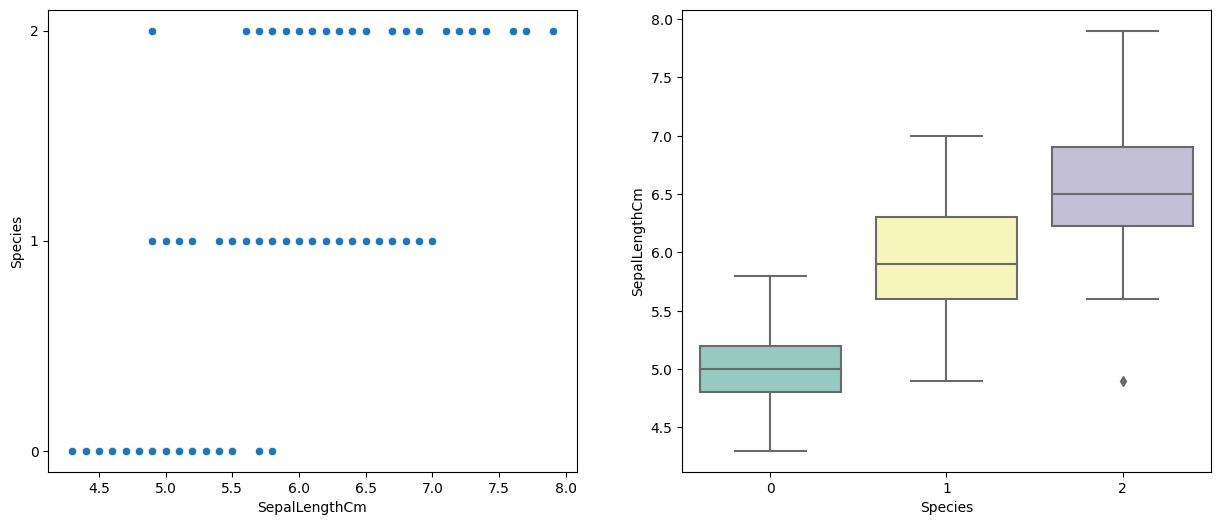

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'SepalLengthCm', y= 'Species')
plt.yticks([0,1,2])

plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'SepalLengthCm', x = 'Species', palette='Set3')

In [46]:
outliers_SepalLengthCm = df[(df['SepalLengthCm'] < 5)  & (df['Species'] == 2)]
outliers_SepalLengthCm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,4.9,2.5,4.5,1.7,2


In [47]:
index_drop_SepalLengthCm = outliers_SepalLengthCm.index
df = df.drop(index_drop_SepalLengthCm, axis=0)

**Removing outlier data for SepalWidthCm**

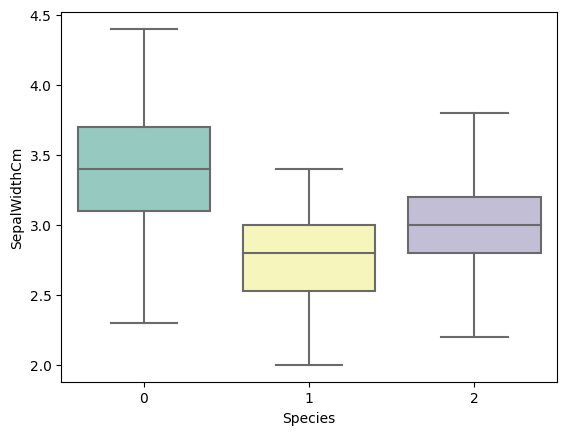

In [51]:
sns.boxplot(data = df, y = 'SepalWidthCm', x='Species', palette='Set3');

The figur shows that it dosen't have any outliers.

**Removing outlier data for PetalLengthCm**

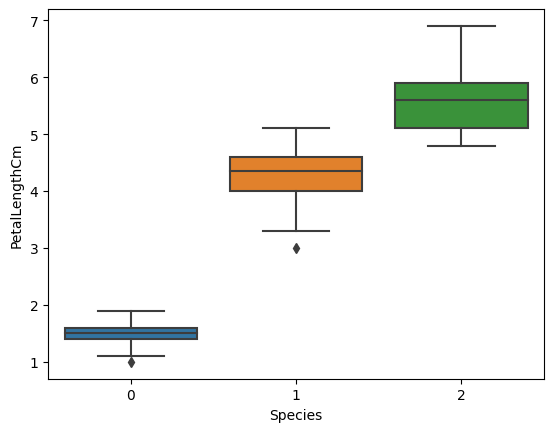

In [53]:
sns.boxplot(data = df, y = 'PetalLengthCm', x='Species');

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

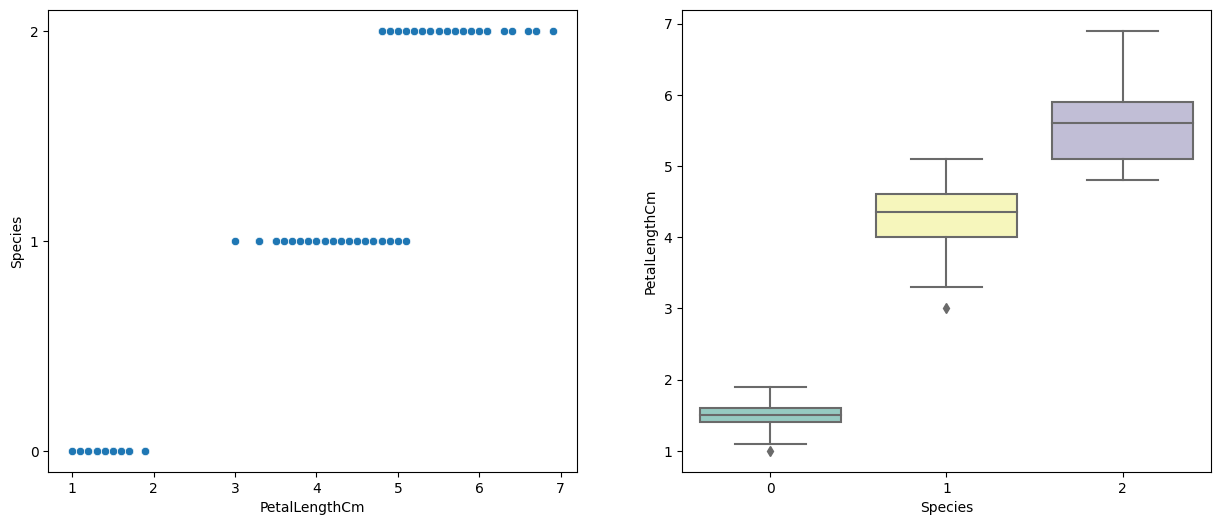

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'PetalLengthCm', y= 'Species')
plt.yticks([0,1,2])

plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'PetalLengthCm', x = 'Species', palette='Set3')

In [58]:
outliers_PetalLengthCm1 = df[(df['PetalLengthCm'] == 3)  & (df['Species'] == 1)]
outliers_PetalLengthCm1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
97,5.1,2.5,3.0,1.1,1


In [59]:
index_drop_SepalLengthCm = outliers_PetalLengthCm1.index
df = df.drop(index_drop_SepalLengthCm, axis=0)

In [60]:
outliers_PetalLengthCm2 = df[(df['PetalLengthCm'] == 1)  & (df['Species'] == 0)]
outliers_PetalLengthCm2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
21,4.6,3.6,1.0,0.2,0


In [61]:
index_drop_SepalLengthCm = outliers_PetalLengthCm2.index
df = df.drop(index_drop_SepalLengthCm, axis=0)

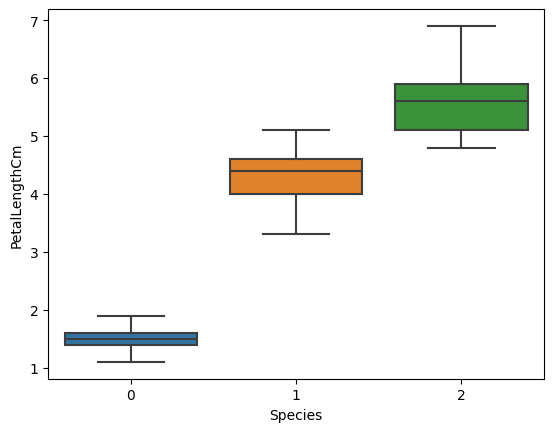

In [63]:
sns.boxplot(data = df, y = 'PetalLengthCm', x='Species');

Finally it dosen't have any outliers.

**Removing outlier data for PetalWidthCm**

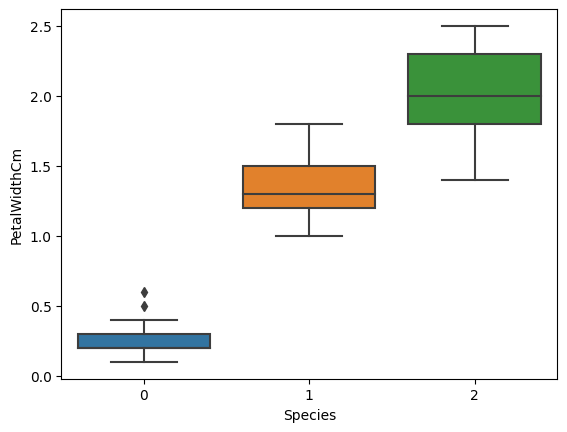

In [62]:
sns.boxplot(data = df, y = 'PetalWidthCm', x='Species');

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

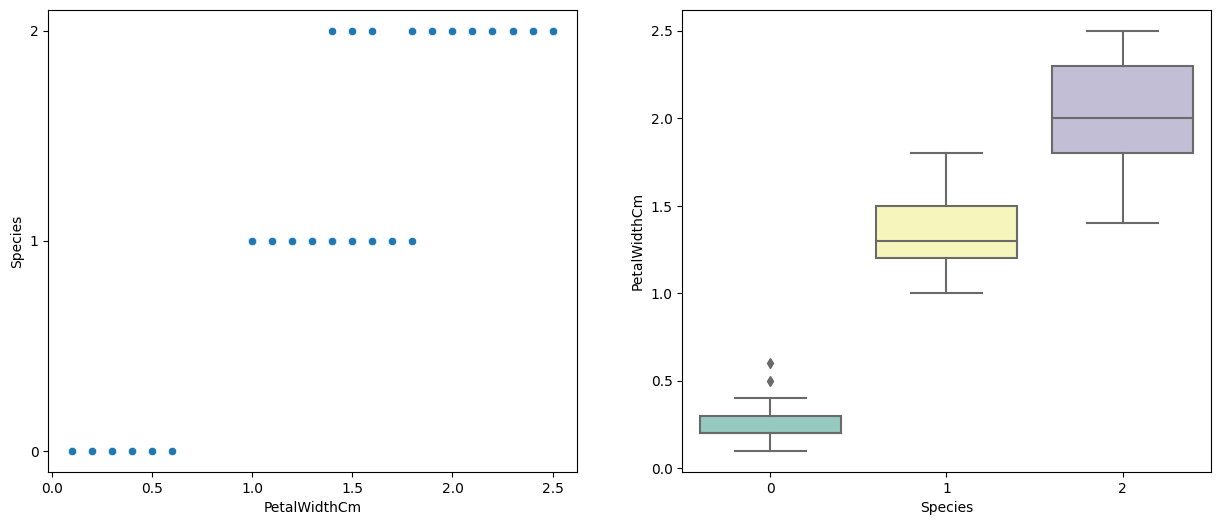

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'PetalWidthCm', y= 'Species')
plt.yticks([0,1,2])

plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'PetalWidthCm', x = 'Species', palette='Set3')

In [70]:
outliers_PetalWidthCm = df[(df['PetalWidthCm'] >= 0.5)  & (df['Species'] == 0)]
outliers_PetalWidthCm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,5.1,3.3,1.7,0.5,0
42,5.0,3.5,1.6,0.6,0


In [71]:
index_drop_SepalLengthCm = outliers_PetalWidthCm.index
df = df.drop(index_drop_SepalLengthCm, axis=0)

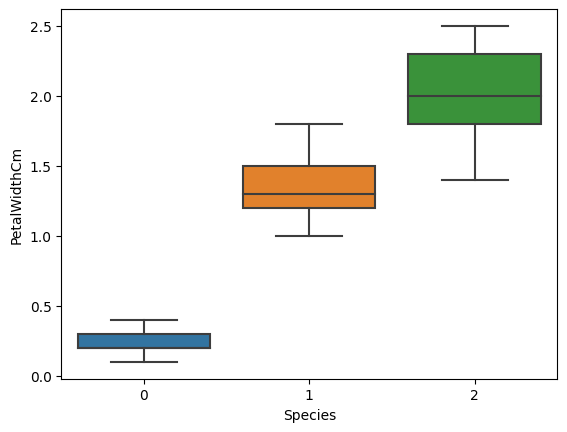

In [72]:
sns.boxplot(data = df, y = 'PetalWidthCm', x='Species');

Finally it dosen't have any outliers, too.

## Step 6: Detemine the Featurea & Target Variable

In [73]:
X = df.drop('Species', axis=1)
y = df['Species']

## Step 7: Split the DataSet to Train & Test

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Step 8: Scaling the Features

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Step 9: Train the Model using the X_train and y_train

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Step 10: Predicting Test Data

In [80]:
y_pred = knn_model.predict(scaled_X_test)

The prediction value VS Actual Value of Test Data

In [81]:
pd.DataFrame({'Y_Test': y_test, "Y_Pred": y_pred}).head()

,Y_Test,Y_Pred
67,1,1
145,2,2
16,0,0
69,1,2
118,2,1


## Step 11: Evaluating the Model

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics

In [87]:
accuracy_score(y_test, y_pred)

0.9318181818181818

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 17,  2],
       [ 0,  1, 11]], dtype=int64)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.89      0.92        19
           2       0.85      0.92      0.88        12

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.93      0.93      0.93        44



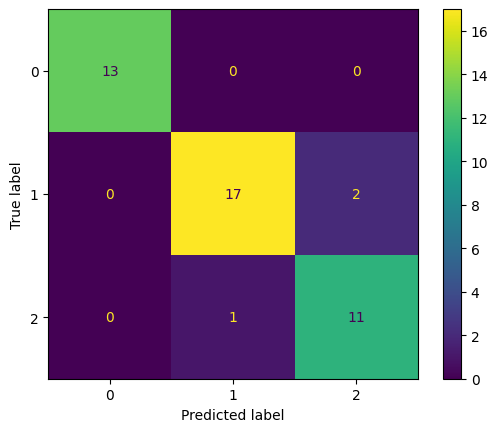

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Model fitting with K-cross Validation and GridSearchCV

In [100]:
knn_model = KNeighborsClassifier()

In [102]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,30))
param_grid = dict(n_neighbors = k_range)

# defining parameter range
grid = GridSearchCV(knn_model, param_grid, cv = 10, scoring = 'accuracy', 
                    return_train_score = False, verbose = 1)


# fitting the model for grid search
grid_search = grid.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


In [103]:
print(grid_search.best_params_)

{'n_neighbors': 8}


**Checking Accuracy on Test Data**

In [104]:
knn_model = KNeighborsClassifier(n_neighbors = 8)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 95.45%
